In [12]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

import scipy as sci
from scipy.stats import linregress as linreg

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [13]:
# ar is as rolled
# aar is annealed + as rolled
# 5 or 2.5 denotes the thickness
data_types = [1,2,3,4] #["ar5", "aar5", "ar25", "aar25"]
data = {}

for key in data_types: data[key] = {}

# as rolled 2.5mm data - FIRST PICTURE
data[1]["section"] = "N"
data[1]["group"] = "B"
data[1]["t"] = 5.0
data[1]["condition"] = "As Rolled"
data[1]["before"] = [5.60, 6.70, 7.21, 8.38] # at mark 1,2,3,4
data[1]["after"] = [4.96, 4.98, 4.98, 5.03]
data[1]["width"] = [19.17, 19.77]
data[1]["hardness"] = [25.6, 29.0, 25.0, 26.7]

# annealed as rolled 5mm data - SECOND PICTURE
data[2]["section"] = "M"
data[2]["group"] = "A"
data[2]["t"] = 5.0
data[2]["condition"] = "Annealed and As Rolled"
data[2]["before"] = [5.61, 6.24, 7.15, 8.31] # at mark 1,2,3,4
data[2]["after"] = [4.96, 4.98, 4.98, 5.02]
data[2]["width"] = [19.17, 19.77]
data[2]["hardness"] = [23.9, 26.8, 26.6, 25.6]

data[2]["fh1"] = [58.2, 59.1, 56.6]
data[2]["fh2"] = [62.0, 60.2, 60.5]
data[2]["fh3"] = [61.8, 61.6, 60.3]
data[2]["fh4"] = [62.8, 63.6, 61.4]

# as rolled 5mm data - THIRD PICTURE
data[3]["section"] = "N"
data[3]["group"] = "A"
data[3]["t"] = 5.0
data[3]["condition"] = "As Rolled"
data[3]["before"] = [5.60, 6.47, 7.30, 8.44] # at mark 1,2,3,4
data[3]["after"] = [5.00, 4.99, 5.07, 5.05, 5.05]
data[3]["width"] = [19.17, 19.65]
data[3]["hardness"] = [30.1, 26.3, 28.4, 27.8]

# annealed and as rolled 2.5mm data - FOURTH PICTURE
data[4]["section"] = "N"
data[4]["group"] = "B"
data[4]["t"] = 2.5
data[4]["condition"] = "Annealed and As Rolled"
data[4]["before"] = [5.57, 6.24, 7.12, 8.26] # at mark 1,2,3,4
data[4]["after"] = [2.54, 2.53, 2.53, 2.54]
data[4]["width"] = [19.17, 20.5] # assumed width because the data is missing
data[4]["hardness"] = [24.1, 28.7, 26.6, 29.3]

data[4]["fh1"] = [59.3, 55.9, 57.2]
data[4]["fh2"] = [60.0, 61.3, 58.8]
data[4]["fh3"] = [57.7, 57.7, 57.1]
data[4]["fh4"] = [58.3, 58.3, 58.0]

as rolled
- speed crack at 4 w/ 2.11mm thickness
- failure everywhere w/ 1.19mm thickness

annealed
- speed crack at 4 w/ 1.74mm thickness
- failure everywhere w/ 0.92mm thickness

# Question 1

- plot the hardness (y) against the cold work percent
- show data for treated and untreated samples

assumptions
- you assumed the width was scaled by the same factor as from 5 -> 2.5

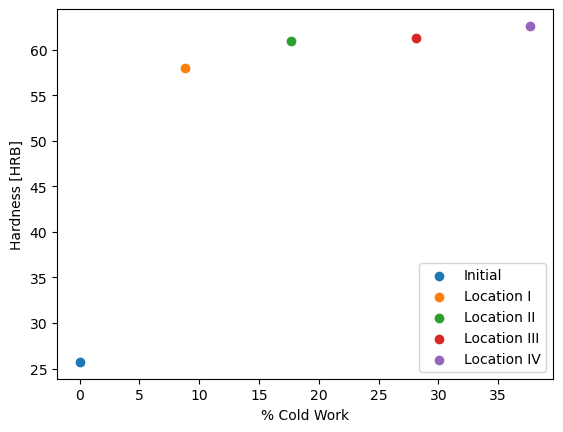

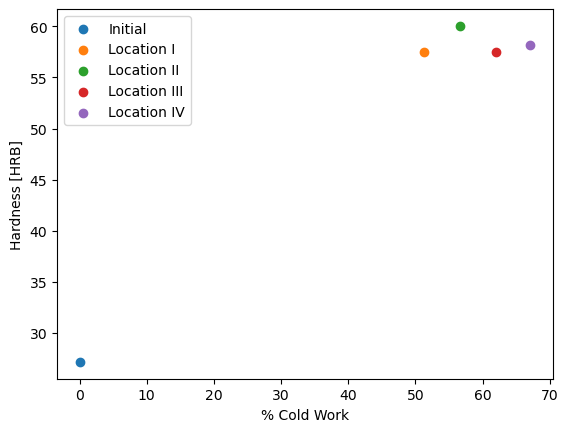

In [49]:
for i in [2,4]:
    # hardnesses
    h0 = np.mean(np.array(data[i]["hardness"]))
    
    h1 = np.mean(np.array(data[i]["fh1"]))
    h2 = np.mean(np.array(data[i]["fh2"]))
    h3 = np.mean(np.array(data[i]["fh3"]))
    h4 = np.mean(np.array(data[i]["fh4"]))

    # cold work percent
    Ai1 = data[i]["width"][0] * data[i]["before"][0]
    Ai2 = data[i]["width"][0] * data[i]["before"][1]
    Ai3 = data[i]["width"][0] * data[i]["before"][2]
    Ai4 = data[i]["width"][0] * data[i]["before"][3]
    
    Af1 = data[i]["width"][1] * data[i]["after"][0]
    Af2 = data[i]["width"][1] * data[i]["after"][1]
    Af3 = data[i]["width"][1] * data[i]["after"][2]
    Af4 = data[i]["width"][1] * data[i]["after"][3]

    cwp1 = (Ai1 - Af1) / Ai1 * 100
    cwp2 = (Ai2 - Af2) / Ai2 * 100
    cwp3 = (Ai3 - Af3) / Ai3 * 100
    cwp4 = (Ai4 - Af4) / Ai4 * 100

    # plotting
    plt.scatter(0, h0, label="Initial")

    plt.scatter(cwp1, h1, label="Location I")
    plt.scatter(cwp2, h2, label="Location II")
    plt.scatter(cwp3, h3, label="Location III")
    plt.scatter(cwp4, h4, label="Location IV")

    plt.xlabel("% Cold Work")
    plt.ylabel("Hardness [HRB]")

    plt.legend()
    
    if (i == 2): plt.savefig("plots/q1rolled.png", dpi=600)
    if (i == 4): plt.savefig("plots/q1annealed.png", dpi=600)
    
    plt.show()

# Question 2

## getting brass data

In [15]:
def parse_csv(qualities, files = "../lab2/data/*.csv"):
    data = {}
    files = glob.glob(files)

    # working in each file
    for file in files:
        key = file.split('/')[3].split("_1.csv")[0][4:]
        
        if key == "BR":
            data[key] = {}
            
            # getting all the single value data queries
            with open(file) as f:
                reader = csv.reader(f)
                for row in reader:
                    try:
                        if row[0] in qualities:
                            try:
                                data[key][row[0]] = float(row[2])
                            except:
                                data[key][row[0]] = row[2]
                    except:
                        continue
    
            # getting list type data queries
            with open(file) as f:
                reader = csv.reader(f)
                record_values = False
    
                time = []
                displacement = []
                force = []
                strain = []
                
                # checks if we are in the time section
                for row in reader:
                    if record_values:
                        try:
                            time.append(float(row[0]))
                            displacement.append(float(row[1]))
                            force.append(float(row[2]))
                            strain.append(float(row[3]))
                        except:
                            break
                    
                    if not record_values:
                        try:
                            if row[0] == "(s)":
                                record_values = True
                        except:
                            continue
    
                # putting in time values
                data[key]["time"] = time
                data[key]["displacement"] = displacement
                data[key]["force"] = force
                data[key]["strain"] = strain

    return data

In [16]:
qualities = ["Gage Diameter", "Grip Diameter", "Rockwell Hardness", "Rockwell Scale", "Final Gage Diameter"]
brass_data = parse_csv(qualities)["BR"]

brass_data.keys()

dict_keys(['Gage Diameter', 'Grip Diameter', 'Rockwell Hardness', 'Rockwell Scale', 'time', 'displacement', 'force', 'strain'])

In [17]:
def stress_strain():
    strain = np.array(brass_data["strain"])
    
    force = np.array(brass_data["force"])
    radius = brass_data["Gage Diameter"] / 2
    
    stress = force / radius**2 / np.pi

    return strain, stress

strain, stress = stress_strain()
bounds = [[0,68], [95, 158], [242, 320]]
strengths = [stress[ub] for lb, ub in bounds]

slopes = []

for lb, ub in bounds:
    _x, _y = strain[lb:ub], stress[lb:ub]
    m = linreg(_x, _y).slope
    slopes.append(m)

q6df = pd.DataFrame([slopes, strengths])
q6df.index = ["Elastic Modulus [GPa]", "Yield Strength"]

## solving

- plot ys vs %CW for brass
- estimate the strength of the most severly cold worked section (2.5 IV) in this lab
- what is the percent strength increase obtained via cold work

In [18]:
brass_data.keys()

dict_keys(['Gage Diameter', 'Grip Diameter', 'Rockwell Hardness', 'Rockwell Scale', 'time', 'displacement', 'force', 'strain'])

% increase in stress:  16.582966247243608
0.4326579528825744 67.11594109541113


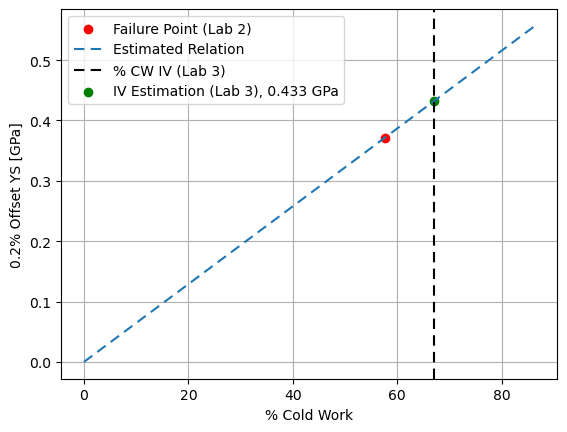

In [51]:
Ai = (brass_data["Gage Diameter"] / 2)**(2) * np.pi
Af = (4.69 / 2)**(2) * np.pi

pcw = (Ai - Af) / Ai * 100
ys = strengths[-1]

x = np.linspace(0, 1.5*pcw, 1000)
y = np.linspace(0, 1.5*ys, 1000)

ys4 = (ys / pcw) * cwp4

plt.scatter(pcw, ys, label=("Failure Point (Lab 2)"), c='r')
plt.plot(x, y, label="Estimated Relation", ls=(0,(5,3)))

plt.axvline(cwp4, ls=(0,(5,3)), c='k', label="% CW IV (Lab 3)")
plt.scatter(cwp4, ys4, label="IV Estimation (Lab 3), {} GPa".format(round(ys4, 3)), c='g')
#plt.axhline(.431)

plt.xlabel("% Cold Work")
plt.ylabel("0.2% Offset YS [GPa]")

plt.grid("both")
plt.legend()
plt.savefig("plots/q2.png", dpi=600)


# percent increase in strength
print("% increase in stress: ", 100 * (ys4 - ys) / ys)
print(ys4, cwp4)

# Question 3

## entering data

In [20]:
# anneal temps
# thickness -> mark -> temp -> [original, as-rolled, rolled+anneal]
q3d = {}

for thickness in [5, 2.5]: 
    q3d[thickness] = {}
    for mark in [2, 4]:
        q3d[thickness][mark] = {}
        for temp in [350, 400, 450, 500]:
            q3d[thickness][mark][temp] = []

# entering data
q3d[5][2][350] = [25, 74, 66]
q3d[5][2][400] = [29, 76, 64]
q3d[5][2][450] = [27, 75, 44]
q3d[5][2][500] = [23, 72, 36]

q3d[5][4][350] = [25, 84, 65]
q3d[5][4][400] = [29,84,62]
q3d[5][4][450] = [27,85,53]
q3d[5][4][500] = [23,84,45]

q3d[2.5][2][350] = [25,89,65]
q3d[2.5][2][400] = [29,89,64]
q3d[2.5][2][450] = [27,89,58]
q3d[2.5][2][500] = [23,89,50]

q3d[2.5][4][350] = [25,90,67]
q3d[2.5][4][400] = [29,90,67]
q3d[2.5][4][450] = [27,90,60]
q3d[2.5][4][500] = [23,90,52]

## plotting

Critical Homo Temp: 0.43010752688172044


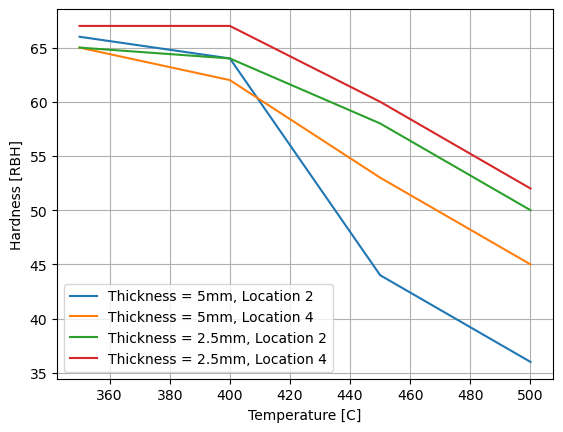

In [52]:
t_melt = 930
t_crit = 400

t_crit_homo = t_crit / t_melt
print("Critical Homo Temp:", t_crit_homo)

for t in q3d.keys():
    for m in q3d[t].keys():
        temps = [350, 400, 450, 500]
        
        hardo = []
        hardr = []
        harda = []
        
        for temp in temps:
            hardo.append(q3d[t][m][temp][0])
            hardr.append(q3d[t][m][temp][1])
            harda.append(q3d[t][m][temp][2])

#        plt.plot(temps, hardo, label="Original")
#        plt.plot(temps, hardr, label="As-Rolled")
        plt.plot(temps, harda, label="Thickness = {}mm, Location {}".format(t,m))

        plt.legend()
        plt.ylabel("Hardness [RBH]")
        plt.xlabel("Temperature [C]")
        plt.grid("both")
#        if t == 2.5: plt.savefig("plots/q3t2dot5m{}.png".format(m),dpi=600)
#        if t == 5: plt.savefig("plots/q3t5m{}.png".format(m),dpi=600)
#        plt.show()
plt.savefig("plots/q3.png")

# Question 5

In [22]:
# the failure will happen at location 4 because it was the
# thickest and will undergo the most change

tri = 8.26
tai = 8.31

trf = 1.19
taf = 0.92

# percent reductions
pa = abs(taf - tai) / tai * 100
pr = abs(trf - tri) / tri * 100

print("% Reduction, annealed:",pa)
print("% Recuction, rolled:",pr)

% Reduction, annealed: 88.92900120336944
% Recuction, rolled: 85.59322033898306
